## Importing modules

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tools import *
from oper import *

rtype = np.float32

## input parameters

In [32]:
## Setting parameter

nx = 201 
nz = 201
nt = 1001
npml = 20

dx = 10.
dz = 10.
dt = 1e-3

order = 2

## set model

In [34]:
vp=np.ones((nz,nx),rtype)*3000
rho=np.ones((nz,nx),rtype)*1.

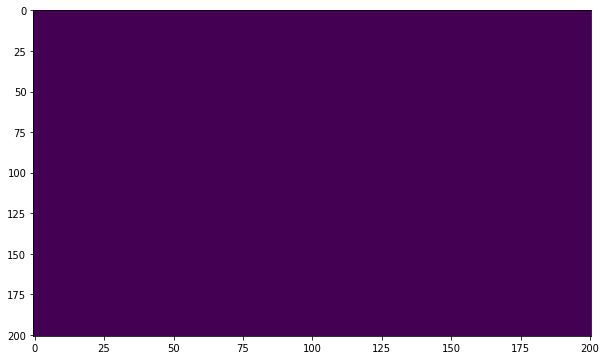

In [35]:
fig = plt.figure(figsize=(10,6))

plt.imshow(vp,aspect='auto')
plt.savefig('True_velocity.jpg')
    

## set source & receiver

In [36]:
nshot = 1
sx = 100 + order
sz = 100 + order


nrcv = nx
rx = 2 + order
rz = 2 + order

In [37]:
## Source

f0 = 5
fmax = f0*3

factor=1; t0=1.2/f0  
a=(np.pi*f0)**2
ricker=np.zeros((nt),rtype)
for it in np.arange(nt):
    dm = a*((it*dt-t0)**2)
    ricker[it] = factor*(1-(2*dm))*np.exp(-dm)
source=ricker


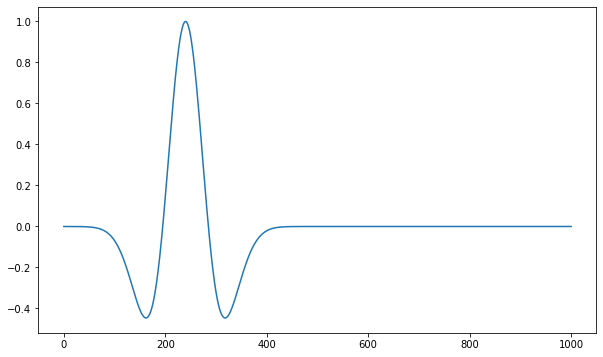

<Figure size 432x288 with 0 Axes>

In [38]:
fig = plt.figure(figsize=(10,6))

plt.plot(source)
plt.show()
plt.savefig('Source.jpg')

## 2D forward modeling

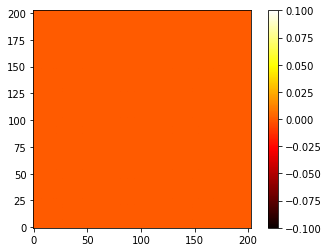

In [42]:
mnx = nx + order
mnz = nz + order

rho = np.ones((mnz, mnx), rtype)
u1 = np.zeros((mnz, mnx), rtype)
u2 = np.zeros_like(u1)
u3 = np.zeros_like(u1)
shot = np.zeros_like(u1)
shot[sz, sx] = 1
mvp = np.ones((mnz, mnx), rtype) * 3000
wavefield = np.zeros((mnz, mnx, nt), rtype)


## Main loop
for t in range(nt):
    for i in range(1, mnx - 1):
        for j in range(1, mnz - 1):
            u3[j, i] = 2 * u2[j, i] - u1[j, i] + ((mvp[j, i] * dt) ** 2) * ((u2[j, i + 1] - 2 * u2[j, i] + u2[j, i - 1]) / dx ** 2 + (u2[j + 1, i] - 2 * u2[j, i] + u2[j - 1, i]) / dz ** 2)
            u3[j, i] = u3[j, i] + (dt ** 2) * (shot[j, i] * source[t])
    
    wavefield[:,:,t] = u3
    # Update time steps
    u1 = u2.copy()
    u2 = u3.copy()
    u3 = np.zeros((mnz, mnx), rtype)

# Plot the final solution
plt.imshow(u3, cmap='gray', origin='lower')
plt.colorbar()
plt.show()


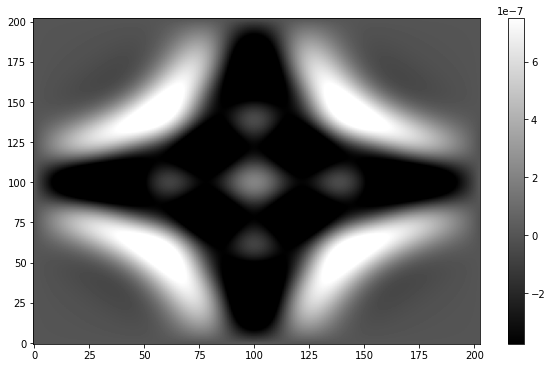

In [59]:
wmin=np.min(wavefield); wmax=np.max(wavefield)
fig = plt.figure(figsize=(10,6))

plt.imshow(wavefield[:,:,1000],aspect='auto', cmap='gray', origin='lower',vmin=wmin*0.1,vmax=wmax*0.1)
plt.colorbar()
plt.savefig('wave_1sec.jpg')
    

In [ ]:
wavefield